Graphs

C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_29188\36307854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_watch, x='subscription_plan', y='watch_duration_minutes', palette=[netflix_red, text_gray, netflix_red])
C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_29188\36307854.py:40: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=total_watch, x='subscription_plan', y='watch_duration_minutes', palette=[netflix_red, text_gray, netflix_red])


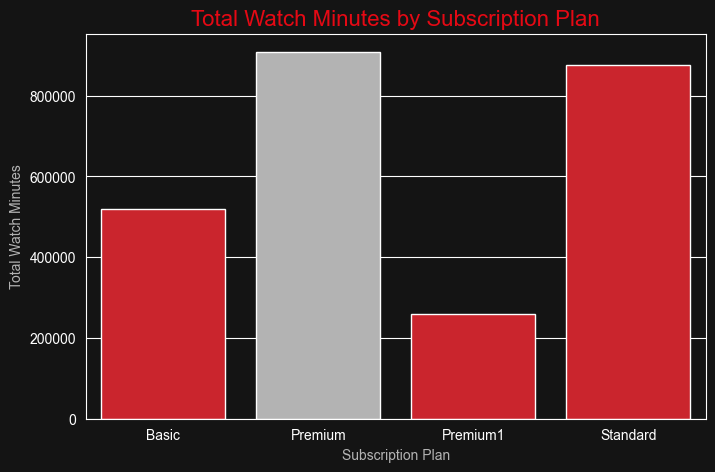

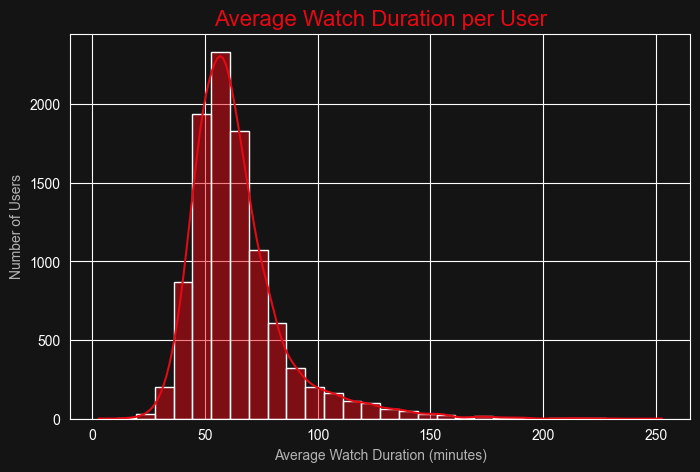

C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_29188\36307854.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spend, x='subscription_plan', y='monthly_spend', palette=[netflix_red, text_gray, netflix_red])
C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_29188\36307854.py:64: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=avg_spend, x='subscription_plan', y='monthly_spend', palette=[netflix_red, text_gray, netflix_red])


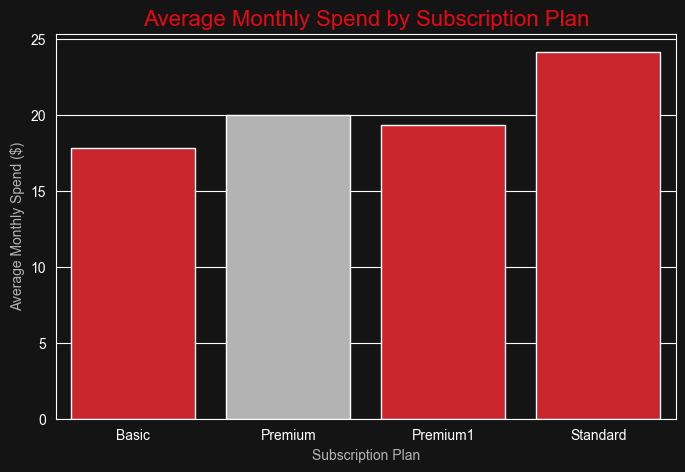

C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_29188\36307854.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='rating', y='genre_primary', palette='Reds_r')


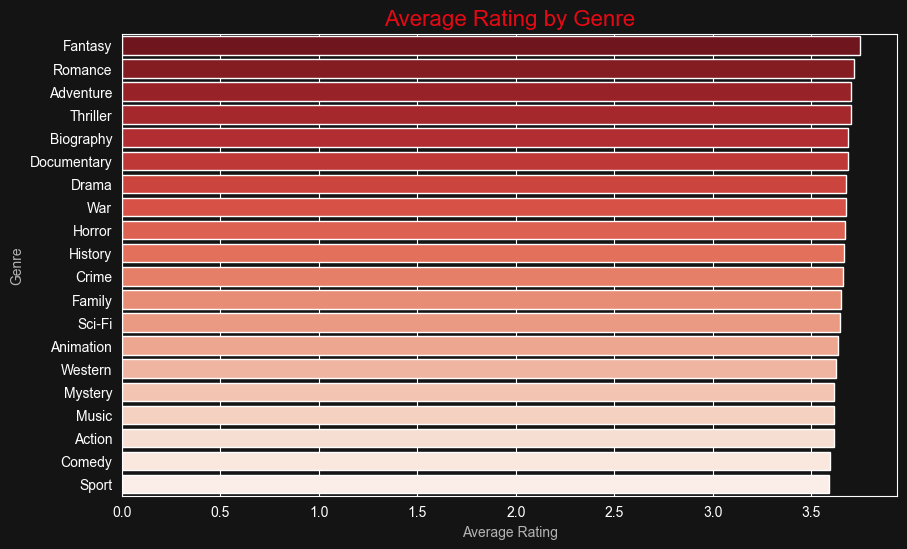

In [20]:
# Netflix User Engagement & Subscription Analysis Charts
# Author: Jitesh
# Requirements: pandas, matplotlib, seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Import Data
# -----------------------------
users = pd.read_csv('users_cleaned_final_fixed.csv')  # user_id, subscription_plan, monthly_spend, active
watch = pd.read_csv('watch_history_fixed.csv')  # user_id, movie_id, watch_duration, device_type
movies = pd.read_csv('movies_cleaned.csv')  # movie_id, title, genre
reviews = pd.read_csv('reviews_cleaned.csv')  # movie_id, rating

# Merge datasets for analysis
watch_users = watch.merge(users, on='user_id', how='left')
watch_movies = watch.merge(movies, on='movie_id', how='left')
movies_reviews = movies.merge(reviews, on='movie_id', how='left')

# Netflix theme colors
netflix_red = '#E50914'
dark_bg = '#141414'
text_gray = '#B3B3B3'

sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = dark_bg
plt.rcParams['figure.facecolor'] = dark_bg
plt.rcParams['axes.labelcolor'] = text_gray
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# -----------------------------
# 2. Total Watch Minutes by Subscription Plan
# -----------------------------
total_watch = watch_users.groupby('subscription_plan')['watch_duration_minutes'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=total_watch, x='subscription_plan', y='watch_duration_minutes', palette=[netflix_red, text_gray, netflix_red])
plt.title('Total Watch Minutes by Subscription Plan', color=netflix_red, fontsize=16)
plt.xlabel('Subscription Plan')
plt.ylabel('Total Watch Minutes')
plt.savefig('Total_Watch_Minutes.png', bbox_inches='tight')
plt.show()

# -----------------------------
# 3. Average Watch Duration per User
# -----------------------------
avg_watch = watch_users.groupby('user_id')['watch_duration_minutes'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.histplot(avg_watch['watch_duration_minutes'], bins=30, color=netflix_red, kde=True)
plt.title('Average Watch Duration per User', color=netflix_red, fontsize=16)
plt.xlabel('Average Watch Duration (minutes)')
plt.ylabel('Number of Users')
plt.savefig('Avg_watch_duration.png', bbox_inches='tight')
plt.show()

# -----------------------------
# 4. Average Monthly Spend by Subscription
# -----------------------------
avg_spend = users.groupby('subscription_plan')['monthly_spend'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_spend, x='subscription_plan', y='monthly_spend', palette=[netflix_red, text_gray, netflix_red])
plt.title('Average Monthly Spend by Subscription Plan', color=netflix_red, fontsize=16)
plt.xlabel('Subscription Plan')
plt.ylabel('Average Monthly Spend ($)')
plt.savefig('Avg_Monthly_Spend.png', bbox_inches='tight')
plt.show()

# -----------------------------
# -----------------------------
# 5. Average Rating by Genre
# -----------------------------

# Merge reviews with movies (include title + genre)
movies_reviews = reviews.merge(
    movies[['movie_id', 'title', 'genre_primary']],
    on='movie_id',
    how='left'
)

avg_rating = (
    movies_reviews
    .groupby('genre_primary')['rating']
    .mean()
    .reset_index()
    .sort_values('rating', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_rating, x='rating', y='genre_primary', palette='Reds_r')
plt.title('Average Rating by Genre', color=netflix_red, fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.savefig('Avg_Rating_by_Genre.png', bbox_inches='tight')
plt.show()


In [21]:
print(hidden_gems_df.shape)
print(hidden_gems_df.head())

(84, 5)
      movie_id            title genre_primary    rating  total_views
4   movie_0005  Warrior Mission         Sport  4.000000            9
19  movie_0020       An Mystery       Fantasy  3.875000            8
25  movie_0026        Last Love        Comedy  4.000000           11
50  movie_0051     Hero Mystery       Western  4.000000            8
54  movie_0055      Queen Quest        Sci-Fi  3.916667           12


In [22]:
print(hidden_gems_avg['rating'].describe())
print(hidden_gems_avg['total_views'].describe())

count    1000.000000
mean        3.659574
std         0.290322
min         2.736842
25%         3.470588
50%         3.666667
75%         3.846154
max         4.454545
Name: rating, dtype: float64
count    1000.000000
mean       15.000000
std         3.823168
min         3.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        28.000000
Name: total_views, dtype: float64


Hidden Gems Found: 84


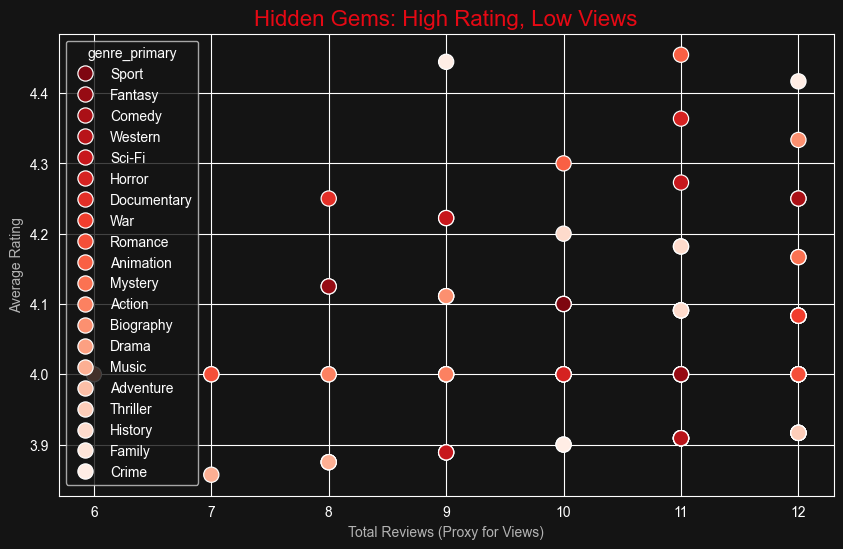

In [23]:
# Merge reviews with movies (make sure this is done)
movies_reviews = reviews.merge(
    movies[['movie_id', 'title', 'genre_primary']],
    on='movie_id',
    how='left'
)

# Calculate average rating per movie
hidden_gems_avg = (
    movies_reviews
    .groupby(['movie_id', 'title', 'genre_primary'])
    .agg(
        rating=('rating', 'mean'),
        total_views=('rating', 'count')   # review count as view proxy
    )
    .reset_index()
)

# Dynamic thresholds (based on your real data)
high_rating_threshold = hidden_gems_avg['rating'].quantile(0.75)
low_view_threshold = hidden_gems_avg['total_views'].quantile(0.25)

# Filter hidden gems
hidden_gems_df = hidden_gems_avg[
    (hidden_gems_avg['rating'] >= high_rating_threshold) &
    (hidden_gems_avg['total_views'] <= low_view_threshold)
]

print("Hidden Gems Found:", hidden_gems_df.shape[0])

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hidden_gems_df,
    x='total_views',
    y='rating',
    hue='genre_primary',
    palette='Reds_r',
    s=120
)

plt.title('Hidden Gems: High Rating, Low Views', color=netflix_red, fontsize=16)
plt.xlabel('Total Reviews (Proxy for Views)')
plt.ylabel('Average Rating')
plt.savefig('Hidden_Gems.png', bbox_inches='tight')
plt.show()